Importing modules.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image as img
import os

Creating paths to data.

In [2]:
test_path = 'data/test'
train_path = 'data/train'

Getting list of items in directories.

In [3]:
camry_test = os.listdir(test_path+'/camry')
not_camry_test = os.listdir(test_path+'/not_camry')

Visualizing car that we need to recognize: 2007 Toyota Camry XLE Hybrid

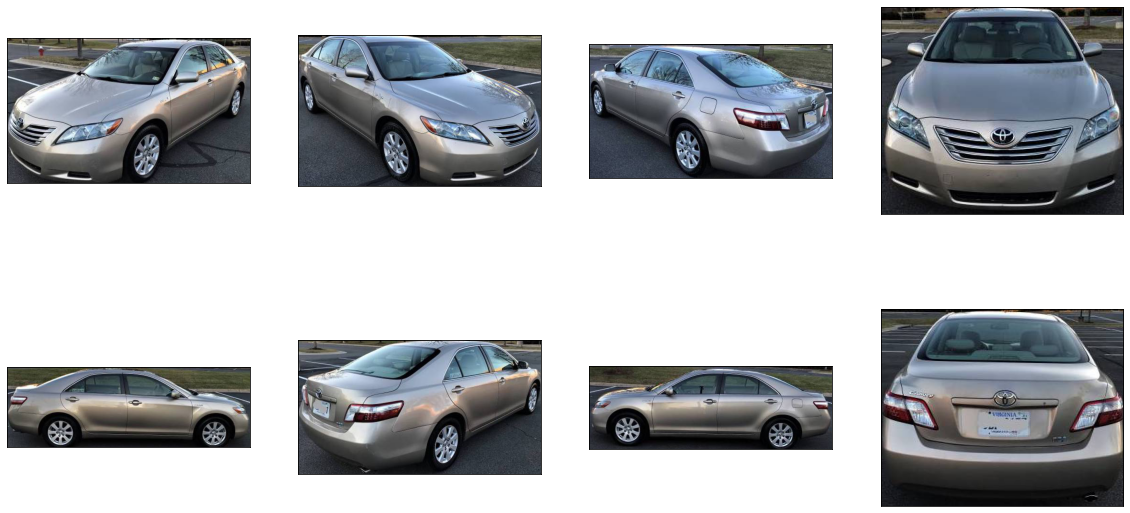

In [4]:
camry_pics = [test_path+'/camry/'+x for x in camry_test]

i = 0
fig, ax = plt.subplots(nrows=2, ncols=4,figsize=(20,10))
for row in ax:
    for col in row:
        col.imshow(img.open(camry_pics[i]))
        col.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
        i += 1

Visualizing cars that we do not want to recognize. These cars were picked due to similaries to the car we want to recognizz. However, therer are cars that are not similar to give the model a little variety.

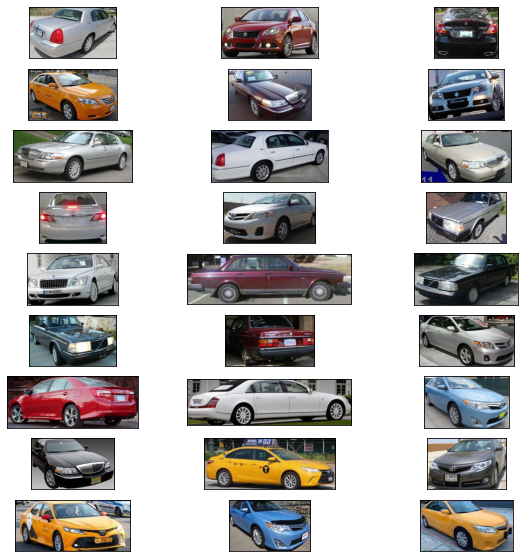

In [5]:
not_camry_pics= [test_path+'/not_camry/'+x for x in not_camry_test if x != '.DS_Store']

i = 0
fig, ax = plt.subplots(nrows=9, ncols=3,figsize=(10,10))
for row in ax:
    for col in row:
        col.imshow(img.open(not_camry_pics[i]))
        col.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
        i += 1

Importing generator to create test-train sets.

In [6]:
from keras.preprocessing.image import ImageDataGenerator

Creating test set.

In [7]:
base_test = ImageDataGenerator(rescale= 1./255).flow_from_directory(test_path,
                                                                        target_size=(256, 256),
                                                                        batch_size=50,
                                                                        class_mode='categorical')

Found 39 images belonging to 2 classes.


Creating train set with random brightness data augmentation.

In [8]:
base_train = ImageDataGenerator(rescale= 1./255,
                                brightness_range=[0.2,1.0]).flow_from_directory(train_path,
                                                                        target_size=(256, 256),
                                                                        batch_size=50,
                                                                        class_mode='categorical')

Found 34 images belonging to 2 classes.


Unpacking generator.

In [9]:
X_train, y_train_label = next(base_train)
X_test, y_test_label = next(base_test)

Checking the shape of the sets.

In [10]:
print('X Shape: '+str(X_train.shape))
print('y Shape: '+ str(y_train_label.shape))
print('X test Shape: '+str(X_test.shape))
print('y test Shape: '+ str(y_test_label.shape))

X Shape: (34, 256, 256, 3)
y Shape: (34, 2)
X test Shape: (39, 256, 256, 3)
y test Shape: (39, 2)


Importing keras to build our model.

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

Tweaked model from Keras example of small datasets. Removed a maxpooling layer and change the metric to binary accuracy.

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=["binary_accuracy"])

Trained model.

In [13]:
model_history = model.fit(X_train,y_train_label,epochs=20,batch_size=10,validation_split=0.3)

Epoch 1/20
3/3 [==============================] - 2s 691ms/step - loss: 2.3394 - binary_accuracy: 0.6136 - val_loss: 2.6216 - val_binary_accuracy: 0.7273
Epoch 2/20
3/3 [==============================] - 1s 444ms/step - loss: 1.6642 - binary_accuracy: 0.7679 - val_loss: 0.5916 - val_binary_accuracy: 0.7273
Epoch 3/20
3/3 [==============================] - 2s 413ms/step - loss: 0.5982 - binary_accuracy: 0.7057 - val_loss: 0.5641 - val_binary_accuracy: 0.7273
Epoch 4/20
3/3 [==============================] - 1s 410ms/step - loss: 0.4690 - binary_accuracy: 0.8022 - val_loss: 0.5954 - val_binary_accuracy: 0.7273
Epoch 5/20
3/3 [==============================] - 1s 410ms/step - loss: 0.5260 - binary_accuracy: 0.8255 - val_loss: 0.5955 - val_binary_accuracy: 0.7273
Epoch 6/20
3/3 [==============================] - 1s 407ms/step - loss: 0.3968 - binary_accuracy: 0.8413 - val_loss: 0.5616 - val_binary_accuracy: 0.7273
Epoch 7/20
3/3 [==============================] - 1s 416ms/step - loss: 0.38

Predicting test set.

In [14]:
prediction = model.predict(X_test)

Importing modules to help visualize results.

In [15]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, classification_report

Extracting results.

In [16]:
prediction_clean = [argmax(x) for x in prediction]
y_test_label = [argmax(x) for x in y_test_label]

Visualizing classification report.

In [17]:
print(classification_report(y_test_label, prediction_clean))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.91      1.00      0.95        31

    accuracy                           0.92        39
   macro avg       0.96      0.81      0.86        39
weighted avg       0.93      0.92      0.92        39



Visualize confusion matrix.

In [18]:
confusion_matrix(y_test_label,prediction_clean)

array([[ 5,  3],
       [ 0, 31]])

In [20]:
model.save('model.h5')